In [141]:
from data_fun import *

In [142]:
!pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
pip install textblob 


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [144]:
import spotipy 
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


import pathlib
import os
import yaml

import pandas as pd 

from dotenv import load_dotenv
load_dotenv()

import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# Import library
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [145]:
with open("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/spotify_details.yml", 'r') as stream:
    spotify_details = yaml.safe_load(stream)

In [146]:
scope = "user-library-read user-follow-read user-top-read playlist-read-private"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=spotify_details['client_id'],
    client_secret=spotify_details['client_secret'],
    redirect_uri=spotify_details['redirect_uri'],
    scope=scope
))

In [42]:
# scope = "user-library-read user-follow-read user-top-read playlist-read-private playlist-modify-public user-top-read user-read-recently-played"
# client_id = os.getenv('client_id')
# client_secret = os.getenv('client_secret')
# redirect_uri = "http://localhost:8080/callback"

In [116]:
# Client ID and Client Secret are set as env variables
# The OAuth authentication manager is used to handle user authentication with the Spotify API. It handles the OAuth 2.0 authentication flow, which involves requesting 
# permission from the user to access their Spotify account and then exchanging an authorization code for an access token. The access token is used to authenticate 
# requests to the Spotify API.

import spotipy
from spotipy.oauth2 import SpotifyOAuth

OAuth = SpotifyOAuth(scope=scope,
                     redirect_uri=redirect_uri,
                    
                     client_id=client_id,
                     client_secret=client_secret)

                     
token = OAuth.get_access_token()

# receive the following warning
# __main__:1: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future 
#  versions. Please adjust your code accordingly, or use get_cached_token instead.
# At this point, I am taken to the user authorization and grant access with the 'user-top-read' scope

# creating an instance of the Spotify class 
# the Spotify class is the main class in the Spotipy library and provides access to the Spotify Web API. It allows you to make requests to the Spotify API 
# and receive responses in a Pythonic way.
# By passing the OAuth authentication manager to the auth_manager argument of the Spotify constructor, you are telling Spotipy to use this authentication manager 
# to authenticate requests made through the Spotify instance sp.
sp = spotipy.Spotify(auth_manager=OAuth)
# get the current user’s top tracks
# outputs JSON data containing all of the information about this playlist
top_tracks = sp.current_user_top_tracks() # 140 słowników
top_tracks



C:\Users\Daria\AppData\Local\Temp\ipykernel_12656\591758908.py:16: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token = OAuth.get_access_token()


{'items': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JP',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL',
     'NO',
     'NZ',
     'PA',
     'PE',
     'PH',
     'PL',
     'PT',
     'P

In [147]:
top_tracks = sp.current_user_top_tracks() # 140 słowników


In [46]:
print("current top artist data: ")
top_artists = offset_api_limit(sp, sp.current_user_top_artists())
top_artists_df = get_artists_df(top_artists)
top_artists_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/top_artists.pkl")

print("current followed artist data: ")
followed_artists = offset_api_limit(sp, sp.current_user_followed_artists())
followed_artists_df = get_artists_df(followed_artists)
followed_artists_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/followed_artists.pkl")


print("current top track data: ")
top_tracks = offset_api_limit(sp, sp.current_user_top_tracks(limit=70))
top_tracks_df = get_tracks_df(top_tracks)
top_tracks_df = get_track_audio_df(sp, top_tracks_df)
top_tracks_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/top_tracks.pkl")


print("saved track data: ")
saved_tracks = offset_api_limit(sp, sp.current_user_saved_tracks())
saved_tracks_df = get_tracks_df(saved_tracks)
saved_tracks_df = get_track_audio_df(sp, saved_tracks_df)
saved_tracks_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/saved_tracks.pkl")



# print("Getting, transforming, and saving tracks recommendations...")
# # Define a sample playlists to yield tracks to get recommendations for, 20 recommendations per track
# recommendation_tracks = get_recommendations(sp, playlist_tracks_df[playlist_tracks_df['playlist_name'].isin(
#     ["Chill", "Chill '20", "Chill '19", "Chill '18", "Your Top Songs 2020", "Your Top Songs 2019", "Your Top Songs 2018"
#      ])].drop_duplicates(subset='id', keep="first")['id'].tolist())
# recommendation_tracks_df = get_tracks_df(recommendation_tracks)
# recommendation_tracks_df = get_track_audio_df(sp, recommendation_tracks_df)
# recommendation_tracks_df.to_pickle("spotify/recommendation_tracks.pkl")


top artist data: 
followed artist data: 
top track data: 


c:\Users\Daria\OneDrive\Pulpit\spotify_project\Spotify-project\data_fun.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('audio_features', 1).assign(**df['audio_features'].apply(pd.Series))


saved track data: 


c:\Users\Daria\OneDrive\Pulpit\spotify_project\Spotify-project\data_fun.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tracks_df = tracks_df.drop('track', 1).assign(**tracks_df['track'].apply(pd.Series))
c:\Users\Daria\OneDrive\Pulpit\spotify_project\Spotify-project\data_fun.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('audio_features', 1).assign(**df['audio_features'].apply(pd.Series))


In [148]:
df = top_tracks_df.copy()
df['genres'] = df['artist_id'].apply(lambda x: sp.artist(x)['genres'])


In [149]:
print(type(df.genres[0]))


<class 'list'>


In [210]:
df.head()
df.columns

Index(['id', 'name', 'popularity', 'type', 'is_local', 'explicit',
       'duration_ms', 'disc_number', 'track_number', 'artist_id',
       'artist_name', 'album_artist_id', 'album_artist_name', 'album_id',
       'album_name', 'album_release_date', 'album_tracks', 'album_type',
       'genres', 'album_genres', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'track_href', 'analysis_url',
       'time_signature', 'subjectivity', 'polarity'],
      dtype='object')

In [151]:
from textblob import TextBlob
# performing a simply sentiment analysis using subjectivity and polarity form TextBlob package.
# then we will use one-hot encoding to list the sentiment of the song titles as one of the input.



def getSubjectivity(text):
  '''
  Getting the Subjectivity using TextBlob
  '''
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  '''
  Getting the Polarity using TextBlob
  '''
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  '''
  Categorizing the Polarity & Subjectivity score
  '''
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(df, text_col):
  '''
  Perform sentiment analysis on text
  ---
  Input:
  df (pandas dataframe): Dataframe of interest
  text_col (str): column of interest
  '''
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [153]:
# Show result
sentiment = sentiment_analysis(df, "name")
sentiment.head()

,id,name,popularity,type,is_local,explicit,duration_ms,disc_number,track_number,artist_id,...,instrumentalness,liveness,valence,tempo,uri,track_href,analysis_url,time_signature,subjectivity,polarity
0,0VgkVdmE4gld66l8iyGjgx,Mask Off,80,audio_features,False,True,204600,1,7,1RyvyyTE3xzB2ZywiAwp0i,...,0.021900,0.165,0.281,150.062,spotify:track:0VgkVdmE4gld66l8iyGjgx,https://api.spotify.com/v1/tracks/0VgkVdmE4gld...,https://api.spotify.com/v1/audio-analysis/0Vgk...,4,low,Neutral
1,2hkGd89f1mtUp19libeWmR,Bliss,56,audio_features,False,False,171425,1,1,67lytN32YpUxiSeWlKfHJ3,...,0.000018,0.129,0.886,126.660,spotify:track:2hkGd89f1mtUp19libeWmR,https://api.spotify.com/v1/tracks/2hkGd89f1mtU...,https://api.spotify.com/v1/audio-analysis/2hkG...,4,low,Neutral
2,0TlLq3lA83rQOYtrqBqSct,Nonstop,76,audio_features,False,True,238614,1,2,3TVXtAsR1Inumwj472S9r4,...,0.012600,0.104,0.423,154.983,spotify:track:0TlLq3lA83rQOYtrqBqSct,https://api.spotify.com/v1/tracks/0TlLq3lA83rQ...,https://api.spotify.com/v1/audio-analysis/0TlL...,4,low,Neutral
3,2gaZJDgE71VL9PzzUUlpMg,Dragonborn,58,audio_features,False,False,235636,1,1,77yY2QmM6bYvjJ3y5L2R0v,...,0.685000,0.111,0.130,66.766,spotify:track:2gaZJDgE71VL9PzzUUlpMg,https://api.spotify.com/v1/tracks/2gaZJDgE71VL...,https://api.spotify.com/v1/audio-analysis/2gaZ...,4,low,Neutral
4,05MYJf19LSo2E1lZ0RrMAC,MŁODY PADEREWSKI,68,audio_features,False,True,130286,1,1,0MIG6gMcQTSvFbKvUwK0id,...,0.000000,0.267,0.527,139.885,spotify:track:05MYJf19LSo2E1lZ0RrMAC,https://api.spotify.com/v1/tracks/05MYJf19LSo2...,https://api.spotify.com/v1/audio-analysis/05MY...,4,low,Neutral


One-hot encoding is a method to transform categorical variables into a machine-understandable langauge. This is done by converting each category into a column so that each category can be represented as either True or False.

In [165]:
tf_df = pd.get_dummies(df["subjectivity"])
print(tf_df)

    high  low
0      0    1
1      0    1
2      0    1
3      0    1
4      0    1
5      1    0
6      0    1
7      0    1
8      1    0
9      0    1
10     0    1
11     0    1
12     0    1
13     0    1
14     1    0
15     0    1
16     0    1
17     0    1
18     0    1
19     0    1
20     0    1
21     0    1
22     0    1
23     1    0
24     0    1
25     0    1
26     1    0
27     0    1
28     0    1
29     0    1
30     0    1
31     0    1
32     0    1
33     0    1
34     0    1
35     0    1
36     0    1
37     0    1
38     1    0
39     0    1
40     0    1
41     1    0
42     0    1
43     0    1
44     0    1
45     0    1
46     0    1
47     0    1
48     0    1
49     0    1


In [154]:
# One-hot encoding for genre data
# przekształcenie każdej kategorii w kolumnę, tak aby każda kategoria mogła być reprezentowana jako Prawda lub Fałsz.


def ohe_prep(df, column, new_name): 
    ''' 
    Create One Hot Encoded features of a specific column
    ---
    Input: 
    df (pandas dataframe): Spotify Dataframe
    column (str): Column to be processed
    new_name (str): new column name to be used
        
    Output: 
    tf_df: One-hot encoded features 
    '''
    # Convert categorical variable into dummy/indicator variables
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df


In [166]:
# One-hot encoding for the subjectivity 
subject_ohe = ohe_prep(sentiment, 'subjectivity','subject')
# subject_ohe

- one artist or track could be associated with multiple genres so we need to weigh the importance of each genre to combat overweighing specific genres while underestimating others!
- we will use TF-IDF which stands for Term Frequency-Inverse Document Frequency, which is a statistical technique used to evaluate the importance of a word in a document based on its frequency in the document and the frequency of the word in the entire corpus of documents.
- the documents are analogous to songs. Therefore, we are calculating the most prominent genre in each song and their prevelent across songs to determine the weight of the genre. This is much better than simply one-hot encoding since there is no weights to determine how important and widespread each genre is, leading to overweighting on uncommon genres.

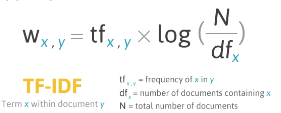
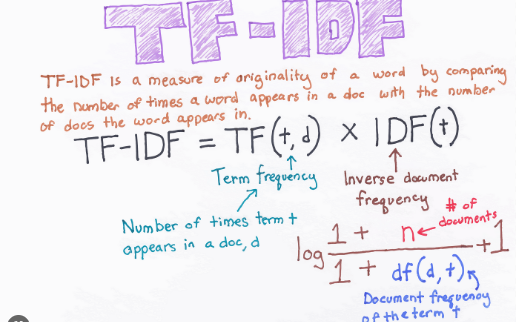

In [174]:
tfidf = TfidfVectorizer()
print(type(tfidf))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)
vectorizer.get_feature_names_out()


print(X.shape)

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483
(4, 9)


In [195]:
# TF-IDF implementation
tfidf = TfidfVectorizer()
tfidf_matrix =  tfidf.fit_transform(df['genres'].apply(lambda x: " ".join(x)))
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

genre|adult           0.0
genre|album           0.0
genre|alternative     0.0
genre|alternativos    0.0
genre|anime           0.0
                     ... 
genre|wave            0.0
genre|west            0.0
genre|world           0.0
genre|yacht           0.0
genre|zolo            0.0
Name: 0, Length: 89, dtype: float64

Normalization
- normalizing some variables. Popularity variables are not normalized to 0 to 1, which would be problematic in the consine similarity function later on
- to solve this problem, we used the MinMaxScaler() function from scikit learn which automatically scales all values from the min and max into a range of 0 to 1.

In [198]:
# Normalization
pop = df[["popularity"]].reset_index(drop = True)
scaler = MinMaxScaler()
pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
pop_scaled.head()

,popularity
0,0.934211
1,0.618421
2,0.881579
3,0.644737
4,0.776316


In [199]:
float_cols = df.dtypes[df.dtypes == 'float64'].index.values
print(float_cols)

['danceability' 'energy' 'loudness' 'speechiness' 'acousticness'
 'instrumentalness' 'liveness' 'valence' 'tempo']


In [211]:
def create_feature_set(df, float_cols):
    '''
    Process spotify df to create a final set of features that will be used to generate recommendations
    ---
    Input: 
    df (pandas dataframe): Spotify Dataframe
    float_cols (list(str)): List of float columns that will be scaled
            
    Output: 
    final (pandas dataframe): Final set of features 
    '''
    
    # Tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['genres'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    genre_df.reset_index(drop = True, inplace=True)
    
    # Sentiment analysis
    df = sentiment_analysis(df, "name")

    # One-hot Encoding
    subject_ohe = ohe_prep(df, 'subjectivity','subject') * 0.3
    polar_ohe = ohe_prep(df, 'polarity','polar') * 0.5
    key_ohe = ohe_prep(df, 'key','key') * 0.5
    mode_ohe = ohe_prep(df, 'mode','mode') * 0.5

    # Normalization
    # Scale popularity columns
    pop = df[["popularity"]].reset_index(drop = True)
    scaler = MinMaxScaler()
    pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns) * 0.2 

    # Scale audio columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    # Concanenate all features
    final = pd.concat([genre_df, floats_scaled, pop_scaled, subject_ohe, polar_ohe, key_ohe, mode_ohe], axis = 1)
    
    # Add song id
    final['id']=df['id'].values
    
    return final

In [212]:
# Save the data and generate the features
float_cols = df.dtypes[df.dtypes == 'float64'].index.values
df.to_csv("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/allsong_data.csv", index = False)

# Generate features
complete_feature_set = create_feature_set(df, float_cols=float_cols)
complete_feature_set.to_csv("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/complete_feature.csv", index = False)
complete_feature_set.head()

,genre|adult,genre|album,genre|alternative,genre|alternativos,genre|anime,genre|art,genre|atl,genre|autore,genre|bossbeat,genre|bubblegum,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.495802,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0VgkVdmE4gld66l8iyGjgx
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,2hkGd89f1mtUp19libeWmR
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0TlLq3lA83rQOYtrqBqSct
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,2gaZJDgE71VL9PzzUUlpMg
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,05MYJf19LSo2E1lZ0RrMAC


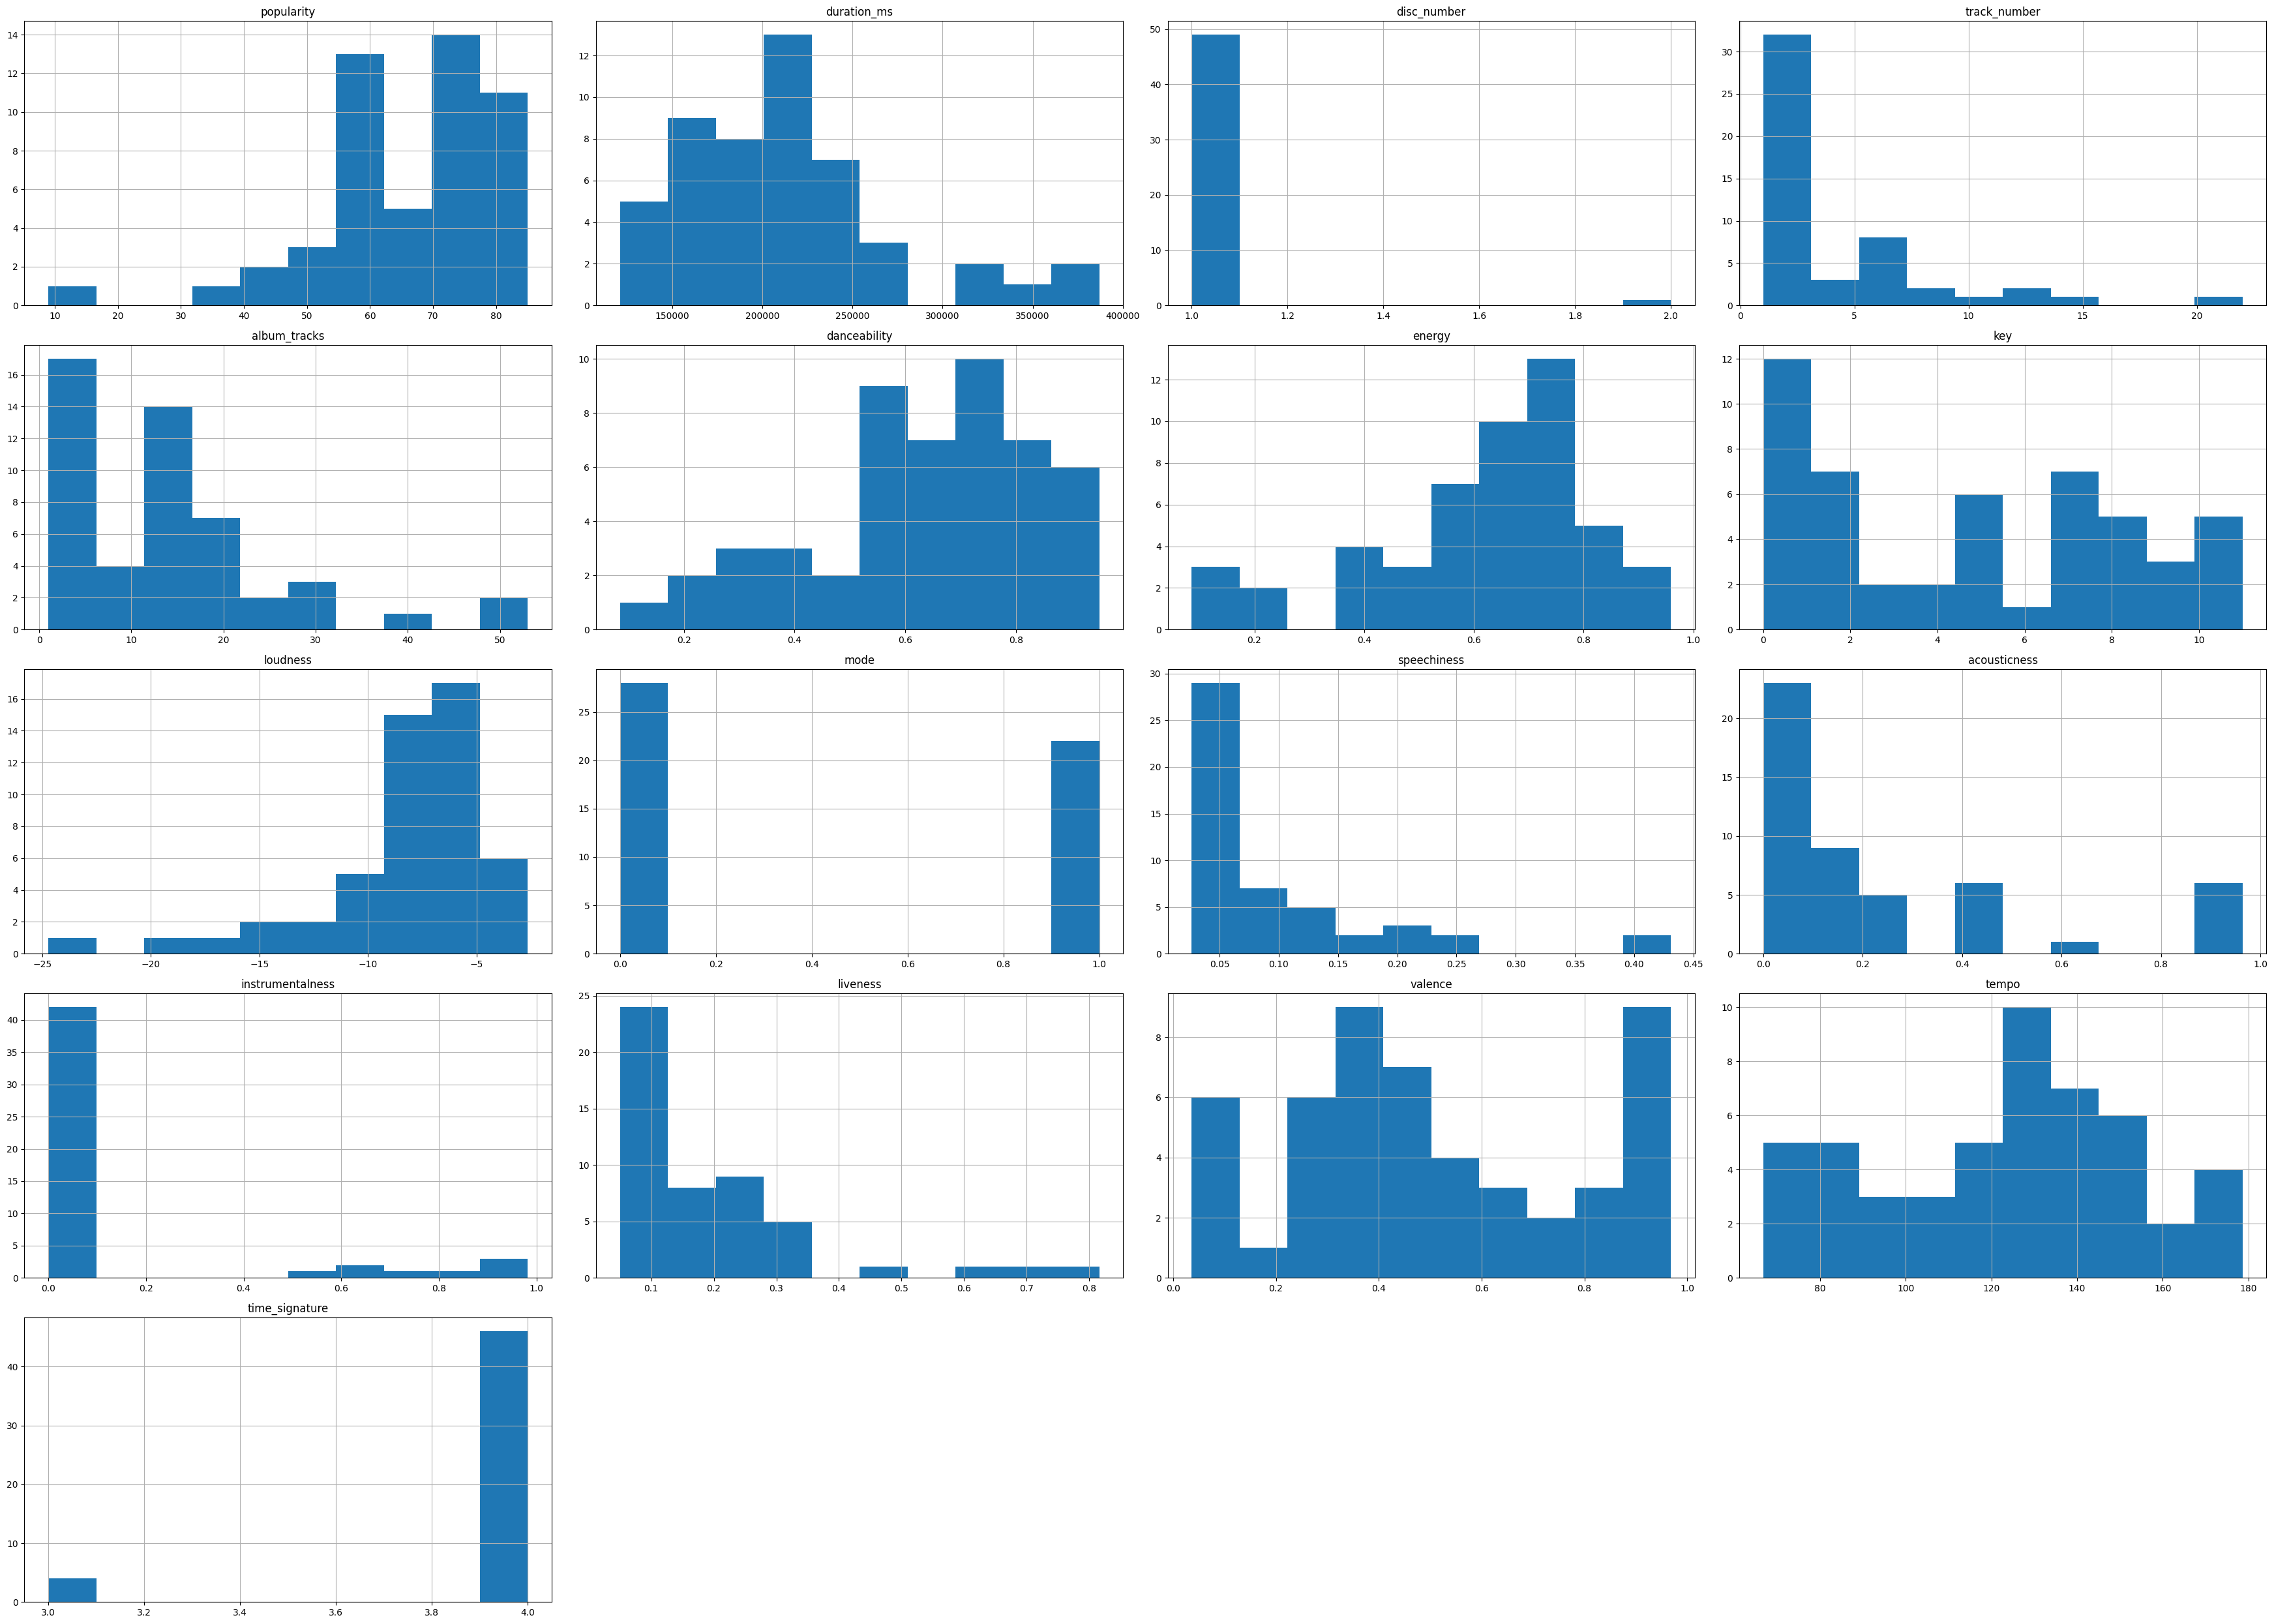

In [112]:
top_tracks_df.hist(figsize=(35,25)) 
plt.tight_layout()
plt.show()

In [91]:
def get_all_playlist_tracks_df(sp, sp_call):
    """
    Get all (non-limited) tracks from a Spotify playlist API call
    :param sp:
    :param sp_call:
    :param sp: Spotify OAuth
    :param sp_call: API function all
    :return: list of tracks
    """
    playlists = sp_call
    # print(playlists)
    playlist_data, data = playlists['items'], []
    # print(playlist_data)
    playlist_ids, playlist_names, playlist_tracks = [], [], []
    for playlist in playlist_data:
        for i in range(playlist['tracks']['total']):
            playlist_ids.append(playlist['id'])
            playlist_names.append(playlist['name'])
            playlist_tracks.append(playlist['tracks']['total'])

        saved_tracks = sp.playlist(playlist['id'], fields="tracks, next")
        results = saved_tracks['tracks']
        data.extend(results['items'])
        while results['next']:
            results = sp.next(results)
            data.extend(results['items'])
    tracks_df = pd.DataFrame(data)
    # Playlists
    tracks_df['playlist_id'] = playlist_ids
    tracks_df['playlist_name'] = playlist_names
    tracks_df['playlist_tracks'] = playlist_tracks
    # Dataframe manipulation
    tracks_df = tracks_df[tracks_df['is_local'] == False]  # remove local tracks (no audio data)
    tracks_df = tracks_df.drop('track', 1).assign(**tracks_df['track'].apply(pd.Series))
    # Album
    tracks_df['album_id'] = tracks_df['album'].apply(lambda x: x['id'])
    tracks_df['album_name'] = tracks_df['album'].apply(lambda x: x['name'])
    tracks_df['album_release_date'] = tracks_df['album'].apply(lambda x: x['release_date'])
    tracks_df['album_tracks'] = tracks_df['album'].apply(lambda x: x['total_tracks'])
    tracks_df['album_type'] = tracks_df['album'].apply(lambda x: x['type'])
    # Album Artist
    tracks_df['album_artist_id'] = tracks_df['album'].apply(lambda x: x['artists'][0]['id'])
    tracks_df['album_artist_name'] = tracks_df['album'].apply(lambda x: x['artists'][0]['name'])
    # Artist
    tracks_df['artist_id'] = tracks_df['artists'].apply(lambda x: x[0]['id'])
    tracks_df['artist_name'] = tracks_df['artists'].apply(lambda x: x[0]['name'])
    # playlist_tracks has ['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail']
    select_columns = ['id', 'name', 'popularity', 'type', 'is_local', 'explicit', 'duration_ms', 'disc_number',
                      'track_number',
                      'artist_id', 'artist_name', 'album_artist_id', 'album_artist_name',
                      'album_id', 'album_name', 'album_release_date', 'album_tracks', 'album_type',
                      'playlist_id', 'playlist_name', 'playlist_tracks',
                      'added_at', 'added_by']
    return tracks_df[select_columns]



In [94]:
print("Getting, transforming, and saving playlist track data...")
playlists = sp.current_user_playlists()
playlist_tracks_df = get_all_playlist_tracks_df(sp, playlists)  # limit of 50 playlists by default
# Create yaml dump
playlist_dict = dict(zip(playlist_tracks_df['playlist_name'], playlist_tracks_df['playlist_id']))
with open('C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/playlists.yml', 'w') as outfile:
    yaml.dump(playlist_dict, outfile, default_flow_style=False)




Getting, transforming, and saving playlist track data...


C:\Users\Daria\AppData\Local\Temp\ipykernel_18332\1208067107.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tracks_df = tracks_df.drop('track', 1).assign(**tracks_df['track'].apply(pd.Series))


In [100]:
print("Getting, transforming, and saving playlist track data...")
playlist_tracks_df = get_all_playlist_tracks_df(sp, sp.current_user_playlists())  # limit of 50 playlists by default
playlist_tracks_df = get_track_audio_df(sp, playlist_tracks_df)
playlist_tracks_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/playlist_tracks.pkl")
# Create yaml dump
playlist_dict = dict(zip(playlist_tracks_df['playlist_name'], playlist_tracks_df['playlist_id']))
with open('C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/playlists.yml', 'w') as outfile:
    yaml.dump(playlist_dict, outfile, default_flow_style=False)

print("Getting, transforming, and saving tracks recommendations...")
# Define a sample playlists to yield tracks to get recommendations for, 20 recommendations per track
recommendation_tracks = get_recommendations(sp, playlist_tracks_df[playlist_tracks_df['playlist_name'].isin(
    ["Chill", "Chill '20", "Chill '19", "Chill '18", "Your Top Songs 2020", "Your Top Songs 2019", "Your Top Songs 2018"
     ])].drop_duplicates(subset='id', keep="first")['id'].tolist())
recommendation_tracks_df = get_tracks_df(recommendation_tracks)
recommendation_tracks_df = get_track_audio_df(sp, recommendation_tracks_df)
recommendation_tracks_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/recommendation_tracks.pkl")

Getting, transforming, and saving playlist track data...


C:\Users\Daria\AppData\Local\Temp\ipykernel_18332\1208067107.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tracks_df = tracks_df.drop('track', 1).assign(**tracks_df['track'].apply(pd.Series))
HTTP Error for GET to https://api.spotify.com/v1/artists/63P6mjkyXIyJkWj8a6yLwO with Params: {} returned 404 due to non existing id


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/artists/63P6mjkyXIyJkWj8a6yLwO:
 non existing id, reason: None